##Import all necessity functions for building the model

In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import re
import nltk
import random
from collections import Counter
from functools import reduce
from itertools import chain
from wordcloud import WordCloud
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU
from keras.activations import tanh, relu, sigmoid, softmax, swish
from keras.regularizers import L1, L2, L1L2
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber
import keras.utils as image
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

##### Plotting the confusion matrix #####
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

###### NLP Libraries ######

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

###### Download functions for nltk ######

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#####Import the dataset

In [39]:
#### Import the dataset ####
df = pd.read_csv('/content/dataset.csv')

#### Show the dataset ####
df.head()

text  humor
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False
1  Watch: darvish gave hitter whiplash with slow ...  False
2  What do you call a turtle without its shell? d...   True
3      5 reasons the 2016 election feels so personal  False
4  Pasco police shot mexican migrant from behind,...  False

#Perform `EDA` - Exploratory data analysis 

####Check the 

In [3]:
#### Show the shape of this dataset ####
def find_shape(df):
  if df.empty:
    raise Exception('DataFrame is empty'.capitalize())
  else:
    return df.shape

#### Call the current function with this current directory ####
try:
  shape = find_shape(df)
except Exception as e:
  print(e.with_traceback)
else:
  print('The shape of this dataset is {}'.format(shape))
  print('*'*50)
  print('The number of instances of this dataset is = {}'.format(shape[0],'\n'))
  print('The number of features of this dataset is = {}'.format(shape[1]))

The shape of this dataset is (200000, 2)
**************************************************
The number of instances of this dataset is = 200000
The number of features of this dataset is = 2


####Check `NaN` value presence or not

In [4]:
#### define a function for NaN check ####
def check_NaN(df):
  if df.empty:
    raise Exception('The DataFrame is empty'.capitalize())
  else:
    if df.isnull().sum().sum() > 0:
      return "NaN value presence in this dataset.".capitalize()
    else:
      return "No NaN value in this dataset.".capitalize()

#### Call the current function with this current directory ####
try:
  checking = check_NaN(df)
  print("The final outcome is: "+checking)
except Exception as e:
  print(e.with_traceback)

The final outcome is: No nan value in this dataset.


####Checking dataset contains `Imbalanced` dataset or not

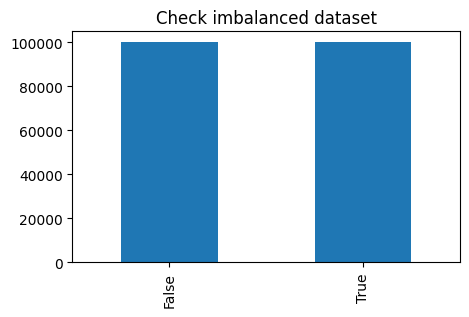

In [5]:
#### Define a function for checking the imbalanced condition of dataset ####
def check_imbalanced(df):
  if df.empty:
    raise Exception('DataFrame is empty'.capitalize())
  else:
    return df.loc[:, 'humor'].value_counts()

#### Call the current function with this current directory ####
try:
  seris = check_imbalanced(df)
except Exception as e:
  print(e.with_traceback)
else:
  plt.figure(figsize = (5, 3))
  plt.title('Check Imbalanced dataset'.capitalize())
  seris.plot(kind = 'bar')
  plt.show()

####Checking the `duplicate` instances presence or not

In [6]:
#### Define a function for checking the duplicate instances ####
def check_duplicate(df):
  if df.empty:
    raise Exception('DataFrame is empty'.capitalize())
  else:
    return df.duplicated().sum()

#### Call the current function with this current directory ####
try:
  duplicate_check = check_duplicate(df)
except Exception as e:
  print(e.with_traceback)
else:
  if duplicate_check == 0:
    print('There is No duplicated instances in this dataset'.capitalize())
  else:
    print('There is duplicated instances in this dataset'.capitalize())

There is no duplicated instances in this dataset


####Checking the `info` of this dataset

In [7]:
#### Define a function for the displaying the info ####
def show_info(df):
  if df.empty:
    raise Exception('DataFrame is empty'.capitalize())
  else:
    print(df.info())

#### Call the current function with this current directory ####

try:
  show_info(df)
except Exception as e:
  print(e.with_traceback)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   humor   200000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.7+ MB
None


#####`Pre-processing` the dataset for finding the insights of the dataset

In [8]:
#### Do the copy of the orginal dataset ####
dummy_df = df.copy()

#### Display the dataset ####
dummy_df.head()

text  humor
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False
1  Watch: darvish gave hitter whiplash with slow ...  False
2  What do you call a turtle without its shell? d...   True
3      5 reasons the 2016 election feels so personal  False
4  Pasco police shot mexican migrant from behind,...  False

####Remove `HTML` or `Number` from the dataset - for analysis

In [9]:
#### define a function to remove the HTML format from the dataset ####
def removeHTML(record):
  CLEANR = re.compile('<.*?>')
  cleantext = re.sub('[^a-zA-Z]', ' ', record)
  return cleantext

try:
  dummy_df.loc[:, 'text'] = dummy_df.loc[:, 'text'].apply(removeHTML)
except Exception as e:
  print(e)
else:
  print(dummy_df.head())

                                                text  humor
0  Joe biden rules out      bid   guys  i m not r...  False
1  Watch  darvish gave hitter whiplash with slow ...  False
2  What do you call a turtle without its shell  d...   True
3        reasons the      election feels so personal  False
4  Pasco police shot mexican migrant from behind ...  False


####Remove `Stopwords` from the dataset - for analysis

In [10]:
#### Define a function for remove the stopwords ####
def removestopwords(record):
  clean_text_ = []

  for word_ in word_tokenize(record):
    if word_ in stopwords.words('english'):
      pass
    else:
      clean_text_.append(word_)
  
  return ' '.join(clean_text_)
  
#### Call the current function with this current directory ####
try:
  dummy_df.loc[:, 'text'] = dummy_df.loc[:, 'text'].apply(removestopwords)
except Exception as e:
  print(e.with_traceback)
else:
  print(dummy_df.head())

                                                text  humor
0                   Joe biden rules bid guys running  False
1      Watch darvish gave hitter whiplash slow pitch  False
2                What call turtle without shell dead   True
3                    reasons election feels personal  False
4  Pasco police shot mexican migrant behind new a...  False


####Use `Stemming` to convert to the `root` text of the dataset 

In [11]:
#### Call the PorterStemmer ####
ps = PorterStemmer()

#### Define a stemming function ####
def stemming(eachRow):
  cleaned = []

  for word in word_tokenize(eachRow):
    cleaned.append(ps.stem(word))

  return ' '.join(cleaned)

  
#### Call the current function with this current directory ####

try: 
  dummy_df.loc[:, 'text'] = dummy_df.loc[:, 'text'].apply(stemming)
except Exception as e:
  print(e.with_traceback)
else:
  print(dummy_df.head())

                                                text  humor
0                         joe biden rule bid guy run  False
1      watch darvish gave hitter whiplash slow pitch  False
2                 what call turtl without shell dead   True
3                           reason elect feel person  False
4  pasco polic shot mexican migrant behind new au...  False


####Install `text-hero` API

In [12]:
!pip install -U texthero

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 69.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 KB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.6 MB/s eta 0:00:00
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26527997 sha256=b5176f599a2b5dea59a7b761367dac38cc4af4c51d51e86c2355f8da493f829b
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempti

In [13]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 94.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019122 sha256=da8f24ad5ffdf5c7208b2498d1cccbfb15622137c02e850a9b9db8888a774e2c
  Stored in directory: /root/.cache/pip/wheels/02/87/47/4d729a97cc46afa46135595b4de32d01461f05947df39166d7
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.5.0
    Uninstalling en-core-web-sm-3.5.0:
      Successfully uninstalled en-core-web-sm-3.5.0


####Visualization of top `20` words of the dataset

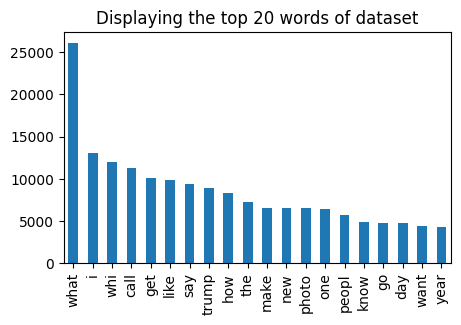

In [14]:
#### Import the texthero ####
import texthero as hero
plt.figure(figsize = (5, 3))
plt.title('Displaying the top 20 words of dataset'.capitalize())
hero.visualization.top_words(dummy_df.loc[:, 'text'])[:20].plot(kind = 'bar')
plt.show()

####Check `Most Frequent words` with respect to `target classes` using `WordCloud`

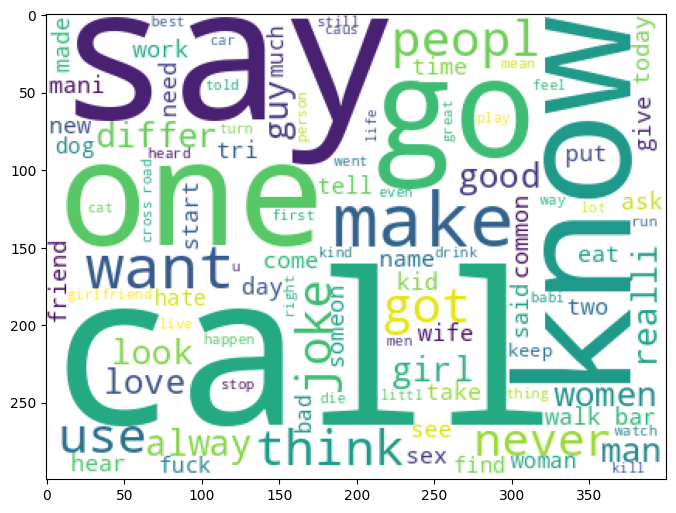

In [24]:
#### show the most frequent word with respect to True ####
plt.figure(figsize = (8, 10))
word_cloud_ = WordCloud(height = 300, width = 400, min_font_size = 8, background_color = 'white')
word_cloud_.generate(dummy_df.loc[dummy_df.loc[:, 'humor'] == True, 'text'].str.cat(sep = ''))

plt.imshow(word_cloud_)
plt.show()

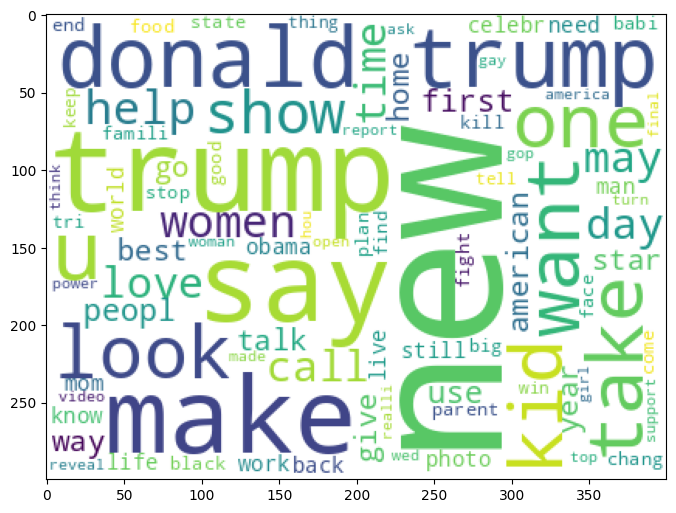

In [23]:
#### show the most frequent word with respect to False ####
plt.figure(figsize = (8, 10))
word_cloud_ = WordCloud(height = 300, width = 400, min_font_size = 8, background_color = 'white')
word_cloud_.generate(dummy_df.loc[dummy_df.loc[:, 'humor'] == False, 'text'].str.cat(sep = ''))

plt.imshow(word_cloud_)
plt.show()

####Visualization of `scatter plot` to understand the data

In [20]:
#### Create a NEW feature named PCA using neumerical conversion TFIDF to convert the Higher dimension into Lower dimension ####
def PCA(df):
  if df.empty:
    raise Exception('The dataset is empty'.capitalize())
  else:
    dummy_df['PCA'] = (hero.tfidf(dummy_df.loc[:, 'text'], max_features=500)).pipe(hero.pca)
    return dummy_df

#### This PCA would be n_components = 2 #####
try:
  dummy_df = PCA(df)
except Exception as e:
  print(e.with_traceback)
else:
  print(dummy_df.head())

#### Visualization the dataset ####
plot = hero.scatterplot(df = dummy_df, col = 'PCA', color = 'humor', title = 'PCA with Scatter')
plt.show()

                                                text  humor  \
0                         joe biden rule bid guy run  False   
1      watch darvish gave hitter whiplash slow pitch  False   
2                 what call turtl without shell dead   True   
3                           reason elect feel person  False   
4  pasco polic shot mexican migrant behind new au...  False   

                                              PCA  
0  [-0.040404052881156775, -0.015066108257928736]  
1    [-0.04797827141828807, -0.01973406078934311]  
2     [0.41987772948343355, 0.026291917801667578]  
3     [-0.0456069730321245, -0.02283263717100465]  
4   [-0.04802075877084062, -0.033316341539685636]  


#Model Building using `BERT- ARCHITECTURE`

In [43]:
#### Convert the target column into Object ####
df.loc[:, 'humor'] = df.loc[:, 'humor'].astype('object')
#### Check the conversion is done successfully or not ####
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   humor   200000 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


####Use last `10000` Dataset for the Validation Test

In [44]:
#### Define a function for validation ####
def validation_dataset(df):
  return df.tail(10000)

val_data = validation_dataset(df)

####Show the shape of this validation dataset ####
try:
  shape = find_shape(val_data)
except Exception as e:
  print(e.with_traceback)
else:
  print('The shape of this dataset is {}'.format(shape))
  print('*'*50)
  print('The number of instances of this dataset is = {}'.format(shape[0],'\n'))
  print('The number of features of this dataset is = {}'.format(shape[1]))

#### Show the validation data ####
val_data.head()

The shape of this dataset is (10000, 2)
**************************************************
The number of instances of this dataset is = 10000
The number of features of this dataset is = 2


text  humor
190000  My friend took a whole bottle of chill pills a...   True
190001  What came first, the chicken or the egg? the r...   True
190002  Mommy, i don't wanna grow up and die! oh. well...   True
190003  Why are tennis equipment factories so loud? be...   True
190004  The cost of not investing in after-school prog...  False

In [45]:
#### Rest of the dataset for using Train and Test ####
df = df[0:-10000]

#### Show the current shape of the dataset ####
try:
  shape = find_shape(df)
except Exception as e:
  print(e.with_traceback)
else:
  print('The shape of this dataset is {}'.format(shape))
  print('*'*50)
  print('The number of instances of this dataset is = {}'.format(shape[0],'\n'))
  print('The number of features of this dataset is = {}'.format(shape[1]))

#### Show the dataset ####
df.head()

The shape of this dataset is (190000, 2)
**************************************************
The number of instances of this dataset is = 190000
The number of features of this dataset is = 2


text  humor
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False
1  Watch: darvish gave hitter whiplash with slow ...  False
2  What do you call a turtle without its shell? d...   True
3      5 reasons the 2016 election feels so personal  False
4  Pasco police shot mexican migrant from behind,...  False

####Make the dataset into `Independent` & `Dependent` Features

In [46]:
def conversion(df):
  if df.empty:
    raise Exception('DataFrame is empty'.capitalize())
  else:
    #### For the traing and testing purpose ####
    X = list(df['text'])
    y = list(df['humor'])
    #### For the validation ####
    X_val = list(val_data['text'])
    y_val = list(val_data['humor'])

    return X, y, X_val, y_val
try:
  X, y, X_val, y_val = conversion(df)
except Exception as e:
  print(e.with_traceback)
else:
  print('The length of X(Independent) Feature is {}'.format(len(X),'\n'))
  print('The length of y(Independent) Feature is {}'.format(len(y),'\n'))
  print('*'*60)
  print('The length of X-validation(Independent) Feature is {}'.format(len(X_val),'\n'))
  print('The length of y-validation(Independent) Feature is {}'.format(len(y_val)))

The length of X(Independent) Feature is 190000
The length of y(Independent) Feature is 190000
************************************************************
The length of X-validation(Independent) Feature is 10000
The length of y-validation(Independent) Feature is 10000


####Convert the `target` - Feature into Neumerical

In [47]:
def convert_target(df):
  return list(pd.get_dummies(y, drop_first = True)[True]),\
  list(pd.get_dummies(y_val, drop_first = True)[True])

y, y_val = convert_target(df)

print(y)
print(y_val)

[0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

####`Split` the dataset into train and test

In [51]:
#### Define a function for splitting the dataset into train and test ####
def split_train_test(df):
  X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                      test_size = 0.30, random_state = 42)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test(df)

#### Display the shape of train and test ####
print('The shape of X_train is = {}'.format(np.array(X_train).shape),'\n')
print('The shape of y_train is = {}'.format(np.array(y_train).shape),'\n')
print('The shape of X_test is  = {}'.format(np.array(X_test).shape),'\n')
print('The shape of y_test is  = {}'.format(np.array(y_test).shape))

The shape of X_train is = (133000,) 

The shape of y_train is = (133000,) 

The shape of X_test is  = (57000,) 

The shape of y_test is  = (57000,)


#Install the `Transformer`

In [52]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.3 MB/s eta 0:00:00


####Call the Tokenizer of `DistilBert` with respect to convert the train and test in an appropraite format.

*We will use `distilbert-base-uncased` model for this `HUMOR DETECTION` problem.

*Using `DistilBert` - `distilbert-base-uncased` containing 6 layers, 768-heads, 65M parameters

In [53]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

try:
  train_encodings = tokenizer(list(X_train), padding = 'max_length', truncation = True, max_length = 50)
  test_encodings  = tokenizer(list(X_test),  padding = 'max_length', truncation = True, max_length = 50)
  val_encodings   = tokenizer(list(X_val),   padding = 'max_length', truncation = True, max_length = 50)
except SyntaxError as e:
  print(e.with_traceback)
else:
  print(train_encodings.keys())
  print(test_encodings.keys())
  print(val_encodings.keys())

dict_keys(['input_ids', 'attention_mask'])
dict_keys(['input_ids', 'attention_mask'])
dict_keys(['input_ids', 'attention_mask'])


####Convert `encodings` with respect to Dataset Objects

* We will convert those into `tensor` because we are going to use `TensorFlow`

In [54]:
import tensorflow as tf

def convert_dataset_object(df):
  if df.empty:
    raise Exception('DataFrame is empty'.capitalize())
  else:
    train_dataset = tf.data.Dataset.from_tensor_slices((
        dict(train_encodings),
        y_train
    ))

    test_dataset = tf.data.Dataset.from_tensor_slices((
        dict(test_encodings),
        y_test
    ))

    val_dataset = tf.data.Dataset.from_tensor_slices((
        dict(val_encodings),
        y_val
    ))

    return train_dataset, test_dataset, val_dataset

#### Call this function with this current directory ####
try:
  train_dataset, test_dataset, val_dataset = convert_dataset_object(df)
except Exception as e:
  print(e.with_traceback)
except TypeError as e:
  print(e)
else:
  print('Conversion into Dataset objects is done successfully'.capitalize())

Conversion into dataset objects is done successfully


####Do the `Hyper Parameter Tuning` to find the best `Arguments` for the `DistilBert`.

* Define some value with respect to the arguments and check which one is able to provide the best model performance.

In [55]:
#### Define some parameters with respect to the DistilBert ####
num_train_epochs = [2, 3]
per_device_train_batch_size = [8]
per_device_eval_batch_size = [16, 64]
eval_steps = [2]

#### Make the Combinations ####
import itertools 

list_combined = [num_train_epochs, per_device_train_batch_size,\
                 per_device_eval_batch_size , eval_steps]

combinations = list(itertools.product(*list_combined))

print(combinations)

[(2, 8, 16, 2), (2, 8, 64, 2), (3, 8, 16, 2), (3, 8, 64, 2)]


In [58]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments
#### Define an empty dictionary ####
dict_evaluation_matrix = {}
#### Define a function that is responsible for the finding the best Param ####
def find_best_arguments(df):
  if df.empty:
    raise Exception('DataFrame is empty'.capitalize())
  else:

    for index, each_combination in enumerate(combinations):
      print('{} comination is running'.format(index + 1))

      training_args = TFTrainingArguments(
        #### output directory ####
        output_dir='./results-check',  
        #### total number of training epochs ####                    
        num_train_epochs = each_combination[0], 
        #### batch size per device during training ####           
        per_device_train_batch_size = each_combination[1],
        #### batch size for evaluation ####
        per_device_eval_batch_size = each_combination[2], 
        #### number of warmup steps for learning rate scheduler #### 
        warmup_steps=500, 
        #### strength of weight decay ####             
        weight_decay=0.01,
        #### directory for storing logs ####            
        logging_dir='./logs-check',   
        #### Logging steps ####      
        logging_steps=10,
        #### Eval_steps ####
        eval_steps = each_combination[3]
      )
      #### Call the model of DistilBert ####
      with training_args.strategy.scope():
        model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")
      
      #### This is responsible to train the DistilBert ####
      trainer = TFTrainer(
        #### the instantiated 🤗 Transformers model to be trained ####
        model=model, 
        #### training arguments, defined above #### 
        args=training_args,  
        #### training dataset ####              
        train_dataset=train_dataset,
        ### evaluation dataset ####       
        eval_dataset=test_dataset           
      )
        
      trainer.train()

      #### Predict the Model ####
      output = trainer.predict(test_dataset)[0]
      output = np.argmax(output, axis = -1)

      #### Print the Evalution Matrix ####
      print(accuracy_score(output, y_test))
      print(precision_score(output, y_test))
      print(recall_score(output, y_test))
      print(f1_score(output, y_test))

      #### Store this into a dictionary for further use ####
      dict_evaluation_matrix[index] = [accuracy_score(output, y_test)]

try:
  dict_eval_matrix = find_best_arguments(df)
except Exception as e:
  print(e)
else:
  print('The dictonary contains: {}\n'.format(dict_eval_matrix))

1 comination is running


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_19', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

0.9861228070175438
0.9836325237592397
0.988468748894627
0.9860447063389849
2 comination is running


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_39', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

0.9858771929824561
0.9828933474128828
0.9887051658818115
0.9857906906959915
3 comination is running


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_59']
You should probably TRAIN this model on a down-stream task to be able to use i

0.9857543859649123
0.9827173530447025
0.9886331444759207
0.9856663724624889
4 comination is running


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_79']
You should probably TRAIN this model on a down-stream task to be able to use i

0.9857894736842105
0.9824357620556142
0.9889802281907731
0.9856971323633281
The dictonary contains: None



In [62]:
#### Find the best parameters for the DistilBert ####
print("The dictionary contains:\n",\
      dict(sorted(dict_evaluation_matrix.items(), key = lambda item: item[1], reverse = True)))

The dictionary contains:
 {0: [0.9861228070175438], 1: [0.9858771929824561], 3: [0.9857894736842105], 2: [0.9857543859649123]}


In [64]:
'''
Here, It is giving the highest accuracy that is 98.61% with the parameters
num_train_epochs = 2
per_device_train_batch_size = 8
per_device_eval_batch_size = 16
eval_steps = 2
'''

####Use those best parameters and check the `testing` and `validation` performance

In [67]:
def train_model(epochs = None, train_batch_size = None,\
                eval_batch_Size = None, eval_steps = None,\
                train_dataset = None, test_dataset = None):

    training_args = TFTrainingArguments(
        output_dir='./results',          
        num_train_epochs = epochs,             
        per_device_train_batch_size = train_batch_size,   
        per_device_eval_batch_size = eval_batch_Size,   
        warmup_steps = 500,               
        weight_decay = 0.01,               
        logging_dir = './logs',            
        logging_steps = 10,
        eval_steps = eval_steps
    )

    with training_args.strategy.scope():
        model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

    trainer = TFTrainer(
        model=model,                        
        args=training_args,                  
        train_dataset=train_dataset,        
        eval_dataset=test_dataset           
    )

    trainer.train()

    output = trainer.predict(train_dataset)[0]
    output = np.argmax(output, axis = -1)

    print("The accuracy is  = ", accuracy_score(output, y_train),'\n')
    print("The precision is = ", precision_score(output, y_train),'\n')
    print("The recall is    = ", recall_score(output, y_train),'\n')
    print("The f1_score is  = ", f1_score(output, y_train),'\n')
  
    return trainer

try:
  trainer = train_model(epochs = 2, train_batch_size = 8,\
                  eval_batch_Size = 16, eval_steps = 2,\
                  train_dataset = train_dataset, test_dataset = test_dataset)
except Exception as e:
  print(e)
else:
  print('Training is completed'.title())

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_99', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

The accuracy is  =  0.9977744360902255 

The precision is =  0.9972205111254676 

The recall is    =  0.9983304504775513 

The f1_score is  =  0.997775172123508 

Training Is Completed


####Do the Evalution for the `Testing, & Validation` dataset

The accuracy is  =  0.9860701754385965 

The precision is =  0.9832453361492433 

The recall is    =  0.9887441597055076 

The f1_score is  =  0.9859870812890473 

************************************************************************************************************************ 

The classification Matrix is given below.

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     28748
           1       0.98      0.99      0.99     28252

    accuracy                           0.99     57000
   macro avg       0.99      0.99      0.99     57000
weighted avg       0.99      0.99      0.99     57000
 

************************************************************************************************************************ 

The confusion Matrix is given below:



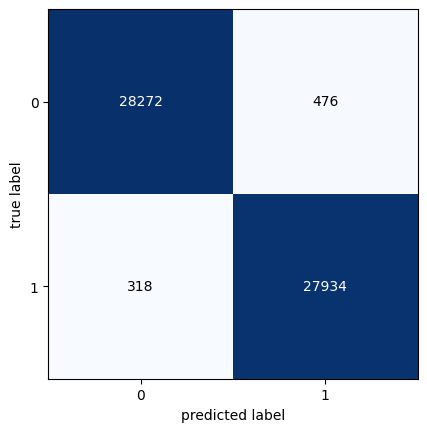

In [68]:
#### Evalution for Testing dataset ####
output = trainer.predict(test_dataset)[0]
output = np.argmax(output, axis = -1)

print("The accuracy is  = ", accuracy_score(output, y_test),'\n')
print("The precision is = ", precision_score(output, y_test),'\n')
print("The recall is    = ", recall_score(output, y_test),'\n')
print("The f1_score is  = ", f1_score(output, y_test),'\n')

print('*'*120,'\n')

print('The classification Matrix is given below.\n')

print(classification_report(output, y_test),'\n')

print('*'*120,'\n')

print('The confusion Matrix is given below:\n')

confusion_mat = confusion_matrix(output, y_test)

fig, ax = plot_confusion_matrix(conf_mat = confusion_mat)

plt.show()

The accuracy is  =  0.986 

The precision is =  0.9823096799840986 

The recall is    =  0.989785699979972 

The f1_score is  =  0.9860335195530726 

************************************************************************************************************************ 

The classification Matrix is given below.

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5007
           1       0.98      0.99      0.99      4993

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 

************************************************************************************************************************ 

The confusion Matrix is given below:



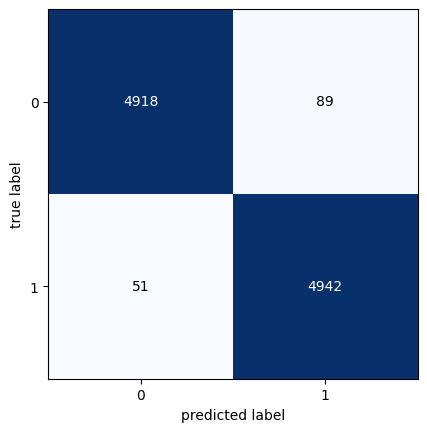

In [69]:
#### Evalution for Validation dataset ####
output = trainer.predict(val_dataset)[0]
output = np.argmax(output, axis = -1)

print("The accuracy is  = ", accuracy_score(output, y_val),'\n')
print("The precision is = ", precision_score(output, y_val),'\n')
print("The recall is    = ", recall_score(output, y_val),'\n')
print("The f1_score is  = ", f1_score(output, y_val),'\n')

print('*'*120,'\n')

print('The classification Matrix is given below.\n')

print(classification_report(output, y_val),'\n')

print('*'*120,'\n')

print('The confusion Matrix is given below:\n')

confusion_mat = confusion_matrix(output, y_val)

fig, ax = plot_confusion_matrix(conf_mat = confusion_mat)

plt.show()

####Do the `KFold` Cross validation with respect to `K`- value = 3.

* K - value 3 because if we increase K-value the memory issue comes and it would be computationaly expensive 



Cross validation is 1 running 



Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_219']
You should probably TRAIN this model on a down-stream task to be able to use 

The accuracy score  =  0.987905390469574
The precision score =  0.9848086843687692
The recall score =  0.9908925898799478
The f1_score score =  0.9878412698412699
************************************************************************************************************************ 

The classification Matrix is given below.

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     31931
           1       0.98      0.99      0.99     31403

    accuracy                           0.99     63334
   macro avg       0.99      0.99      0.99     63334
weighted avg       0.99      0.99      0.99     63334
 

************************************************************************************************************************ 

The confusion Matrix is given below:



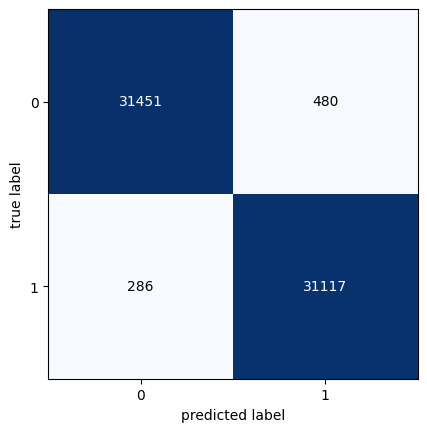

Cross validation is 2 running 



Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_239', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use 

The accuracy score  =  0.9986263085595187
The precision score =  0.9982369978592117
The recall score =  0.9990232836573301
The f1_score score =  0.998629985984914
************************************************************************************************************************ 

The classification Matrix is given below.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31594
           1       1.00      1.00      1.00     31739

    accuracy                           1.00     63333
   macro avg       1.00      1.00      1.00     63333
weighted avg       1.00      1.00      1.00     63333
 

************************************************************************************************************************ 

The confusion Matrix is given below:



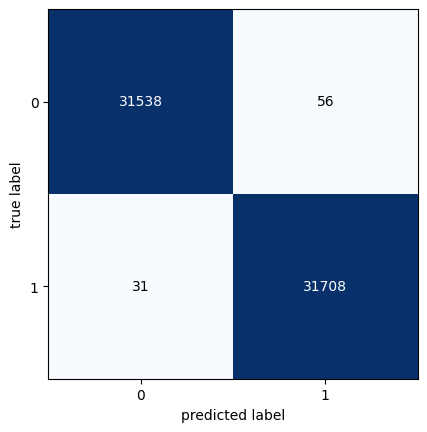

Cross validation is 3 running 



Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_259']
You should probably TRAIN this model on a down-stream task to be able to use 

The accuracy score  =  0.9972368275622503
The precision score =  0.9964882308276386
The recall score =  0.9979721808561199
The f1_score score =  0.997229653785876
************************************************************************************************************************ 

The classification Matrix is given below.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31772
           1       1.00      1.00      1.00     31561

    accuracy                           1.00     63333
   macro avg       1.00      1.00      1.00     63333
weighted avg       1.00      1.00      1.00     63333
 

************************************************************************************************************************ 

The confusion Matrix is given below:



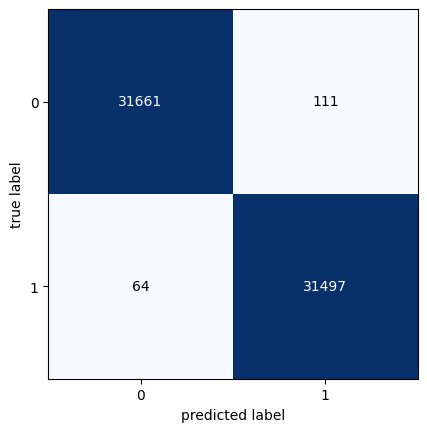

In [79]:
Kfold = KFold(n_splits = 3, shuffle = True, random_state = 42)
acc, pre, recall, f1 = [], [], [], []
count = 1
for train_index, test_index in Kfold.split(X):

  print('Cross validation is {} running'.format(count),'\n')

  X = np.array(X)
  y = np.array(y)
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  X = list(X)
  y = list(y)
  
  train_encodings = tokenizer(list(X_train), padding = 'max_length', truncation=True, max_length = 50)
  test_encodings  = tokenizer(list(X_test),  padding = 'max_length', truncation=True, max_length = 50)

  train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train 
  ))

  test_dataset = tf.data.Dataset.from_tensor_slices((
      dict(test_encodings),
      y_test
  ))

  from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

  training_args = TFTrainingArguments(
      output_dir='./results',          # output directory
      num_train_epochs=2,              # total number of training epochs
      per_device_train_batch_size=8,   # batch size per device during training
      per_device_eval_batch_size=16,   # batch size for evaluation
      warmup_steps=500,                # number of warmup steps for learning rate scheduler
      weight_decay=0.01,               # strength of weight decay
      logging_dir='./logs',            # directory for storing logs
      logging_steps=10,
      eval_steps = 2
  )
    
  with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")
  
  trainer = TFTrainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset            # evaluation dataset
  )
  
  trainer.train()

  output = trainer.predict(test_dataset)[0]
  output = np.argmax(output, axis = -1)

  print("The accuracy score  = ", accuracy_score(output, y_test))
  print("The precision score = ",precision_score(output, y_test))
  print("The recall score = ",recall_score(output, y_test))
  print("The f1_score score = ",f1_score(output, y_test))

  print('*'*120,'\n')

  print('The classification Matrix is given below.\n')

  print(classification_report(output, y_test),'\n')

  print('*'*120,'\n')

  print('The confusion Matrix is given below:\n')

  confusion_mat = confusion_matrix(output, y_test)

  fig, ax = plot_confusion_matrix(conf_mat = confusion_mat)

  plt.show()

  acc.append(accuracy_score(output, y_test))
  pre.append(precision_score(output, y_test))
  recall.append(recall_score(output, y_test))
  f1.append(f1_score(output, y_test))

  count = count + 1

In [80]:
#### Show the Evaluation Matrix after using KFold -3 ####
print('Using KFold - 3, the accuracy of this model is {}'.format(np.array(acc).mean()),'\n')
print('Using KFold - 3, the precision of this model is {}'.format(np.array(pre).mean()),'\n')
print('Using KFold - 3, the recall of this model is {}'.format(np.array(recall).mean()),'\n')
print('Using KFold - 3, the f1 score of this model is {}'.format(np.array(f1).mean()))

Using KFold - 3, the accuracy of this model is 0.994589508863781 

Using KFold - 3, the precision of this model is 0.9931779710185399 

Using KFold - 3, the recall of this model is 0.9959626847977994 

Using KFold - 3, the f1 score of this model is 0.9945669698706867


#For `Single Data` Prediction - `HUMOR DETECTION`

In [196]:
class humor_prediction:

  def __init__(self, text):
    print('\n\nThe Prediction is Given below'.title())
    print('*'*70,'\n\n')
    self.text = text
    self.text_preprocessing()
  
  def text_preprocessing(self):
    preprocessing = tf.data.Dataset.from_tensor_slices((
      dict(tokenizer((self.text),\
                     padding = 'max_length',\
                     truncation=True,\
                     max_length = 50)),
                     [1]
          ))
    
    self.prediction(preprocessing)

  def prediction(self, preprocessing_result):
    output = trainer.predict(preprocessing_result)[0]
    output = np.argmax(output, axis = -1)
    if output[0] == 0:
      print("The prediction is False".capitalize())
    else:
      print("The prediction is True".capitalize())

#### Call the class and predict the model ####
try:
  print('Welcome to the detect Humor'.title())
  print('*'*70,'\n')
  text = (str(input("Enter the text:\n\n")))
except NameError as e:
  print(e.with_traceback)
else:
  humor_detect = humor_prediction([text])

Welcome To The Detect Humor
********************************************************************** 

Enter the text:

How does stephen hawking refresh after a long day? f5


The Prediction Is Given Below
********************************************************************** 


The prediction is true
